<a href="https://colab.research.google.com/github/eroali/DeepLearning/blob/main/Copy_of_Module_3_Convoutional_neural_network_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying Dog and Cat using CNN on Tensorflow 2.x

This is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook file. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. Run all the notebook code cells: Select *Runtime* > *Run all*.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pwd

##Problem Statement

**Dataset:** The Dogs vs. Cats dataset is a standard computer vision dataset that involves classifying photos as either containing a dog or cat
<br>
It was only effectively addressed in the last few years using deep learning convolutional neural networks. While the dataset is effectively solved, it can be used as the basis for learning and practicing how to develop, evaluate, and use convolutional deep learning neural networks for image classification

####**Tasks to be Performed**

In this tutorial you will be performing the following tasks:
- Prepare the dataset for the model
- Install Tensorflow 2.x
- Develop convolutional neural network model for classifying the images or Dog Vs cat
- Plot the change in accuracy per epochs
- Evaluate the model on the testing data
- Analyse the model summary
- Add Dropout to prevent overfitting and check its effect on accuracy
- Increasing the number of Hidden Layers check its effect on accuracy
- Manipulate the batch_size and epochs and check its effect on accuracy


####**Dataset Description**



The **Dog Vs Cat** image classification dataset consists of 8005 images belonging to 2 classes for training images and 2023 images belonging to 2 classes for testing images 


1.   Class I = Dog
2.   Class II= Cat

![alt text](https://imgur.com/d8Qd1hD.gif)


####**Skills Gained**

 TensorFlow 2.x 
- Convolutional neural network implementation
- Model Improvisation
- Model Save
- Load the pretrained model


# Solution: Classifying Dog and Cat using CNN on Tensorflow 2.x

##Pre-process  the Dataset 


#####<b>Before start coding please enable your GPU





![alt text](https://i.imgur.com/QGIPBWR.png)

#### <b> Load the  Dataset

In [ ]:
#!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
#!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

!wget -cq https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!unzip -qq training_set.zip
!wget -cq https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip
!unzip -qq test_set.zip


replace training_set/training_set/cats/_DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


#### <b> Unzip the  Data

In [ ]:
#!unzip training_set.zip
#!unzip test_set.zip

#### <b> Visualize the  Data

Populating the interactive namespace from numpy and matplotlib


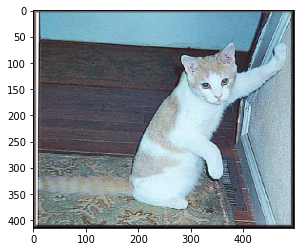

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/test_set/test_set/cats/cat.4001.jpg')
imgplot = plt.imshow(img)
plt.show()


In [ ]:
img.shape

(415, 498, 3)

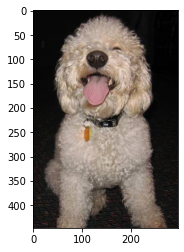

In [ ]:
img=mpimg.imread('/content/test_set/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()


In [ ]:
img.shape

(447, 297, 3)

##  Import Libraries

In [ ]:
import tensorflow 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#####Check the TensorFlow version

In [ ]:
print(tensorflow.__version__)

2.4.0


## Designing the Model

#### <b> Initialize the parameters

In [ ]:
img_width, img_height = 150,150  #width and height of the images
train_data_dir = r"/content/training_set/training_set"


validation_data_dir=r"/content/test_set/test_set"


nb_train_sample =100
nb_validation_samples =100
epochs =20
batch_size= 20

#### <b> Check the shape of the image

Two ways to  to represent the image data as a three dimensional array

1. <b>  Channels Last:<b> Image data is represented in a three-dimensional array where the last channel represents the color channels, e.g. [rows][cols][channels].

2.  <b> Channels First:<b> Image data is represented in a three-dimensional array where the first channel represents the color channels, e.g. [channels][rows][cols].


In [ ]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first': 
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)


#### <b> Generate Images to train the model



1.   Rescale
2.   Shear_range
3.   Zoom_range
4.  Horizontal_flip

![alt text](https://i.imgur.com/Az24gjL.png)


- This class allows to configure random transformations and normalization on the allocated image during training time
- Prevents overfitting and helps to generate a generalize model
- Never repeats the exact same images twice  to train our model




In [ ]:
train_datagen=ImageDataGenerator ( rescale=1. /255,
                                  shear_range =0.2,
                                  zoom_range=0.2,
                                  horizontal_flip =True)


test_datagen=ImageDataGenerator (rescale=1. /255)


train_generator =train_datagen.flow_from_directory(train_data_dir,
                                                   target_size =(img_width,img_height), 
                                                   batch_size=batch_size,
                                                   class_mode='binary',
                                                   classes=['cats','dogs'])
#Now this, will generate training generator data
#Target_size = mentioned image_width and image_height
#Batch_size = 20 (already mentioned)
#Class_mode = binary(because here only two classes are there to classify)


validation_generator =test_datagen.flow_from_directory(validation_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary')
#Now, this will generate testing generator data
#Target_size = mentioned image_width and image_height
#Batch_size = 20 (already mentioned)
#Class_mode = binary(because here only two classes are there to classify)



Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


####**Visual Representation of ImageDataGenerator**

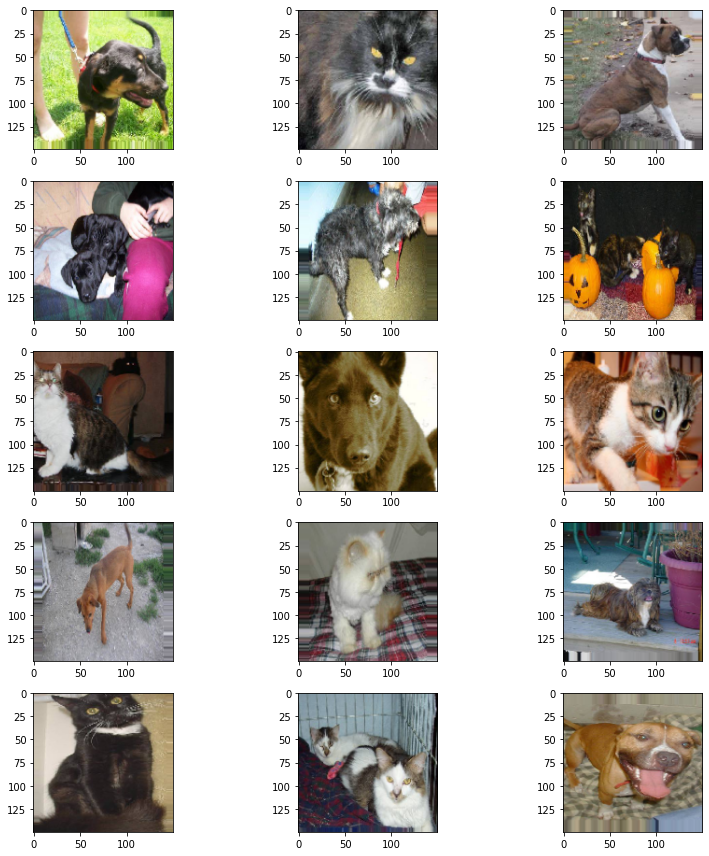

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

### <b> Build the basic CNN model 0 

####<b> Layers in CNN:


<b>

1.   Conlutional Layer
2.   ReLu
3. Pooling Layer
4. Fully Connected Layer (Dense)


![alt text](https://i.imgur.com/P4yvxRW.png)

![alt text](https://i.imgur.com/a2vSxQW.png)


- Adding convolutional neural network in the model
- add() - Helps to add layers in the model
- Conv2D() - Convolutional layer (to extract features from the images)
- Conv2D(32,(3,3),input_shape=input_shape) 
  - 32 - Take 32 features from the given image
  - (3,3) - Metrics size of the images(3*3)
  - input_shape = image size 

- Activation function (relu) is added to remove the negative values


In [ ]:
'''
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

'''

In [ ]:
model = Sequential()

model.add(Conv2D(filters=64,kernel_size=(3,3), activation='relu',input_shape=input_shape)) 
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=64,kernel_size=(3,3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(128, activation = 'relu')) 
model.add(Dense(1, activation = 'sigmoid')) #output layer
model.summary()


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 18496)           

#### <b> Compile the basic CNN model 

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 18496)           

#### <b> Fit the basic CNN model 

In [ ]:
training = model.fit_generator(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
100/100 [==============================] - 20s 197ms/step - loss: 0.8371 - accuracy: 0.5251 - val_loss: 0.6714 - val_accuracy: 0.6295
Epoch 2/20
100/100 [==============================] - 20s 197ms/step - loss: 0.6817 - accuracy: 0.5767 - val_loss: 0.6473 - val_accuracy: 0.5840
Epoch 3/20
100/100 [==============================] - 20s 196ms/step - loss: 0.6483 - accuracy: 0.6285 - val_loss: 0.6583 - val_accuracy: 0.6000
Epoch 4/20
100/100 [==============================] - 19s 195ms/step - loss: 0.6356 - accuracy: 0.6388 - val_loss: 0.5651 - val_accuracy: 0.7010
Epoch 5/20
100/100 [==============================] - 19s 194ms/step - loss: 0.6145 - accuracy: 0.6833 - val_loss: 0.6074 - val_accuracy: 0.6565
Epoch 6/20
100/100 [==============================] - 20s 196ms/step - loss: 0.6000 - accuracy: 0.6989 - val_loss: 0.5841 - val_accuracy: 0.6960
Epoch 7/20
100/100 [==============================] - 19s 193ms/step - loss: 0.5637 - accuracy: 0.7099 - val_loss: 0.5546 - val_ac

#### <b> Find the accuracy score


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


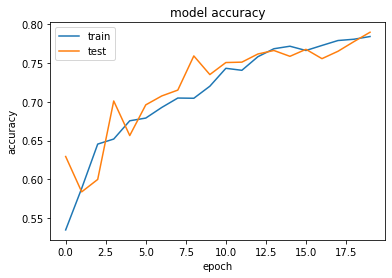

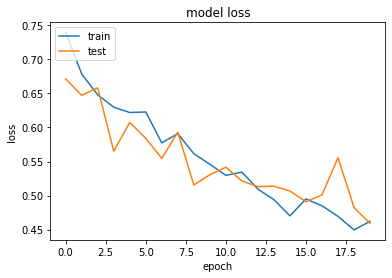

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


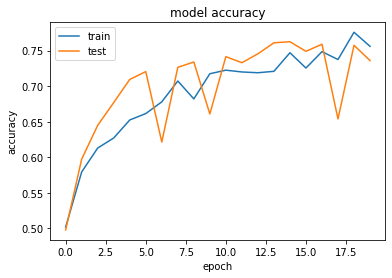

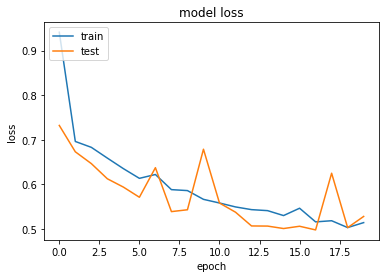

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### <b> Predict the image


[[1.]]
Prediction:  Dog


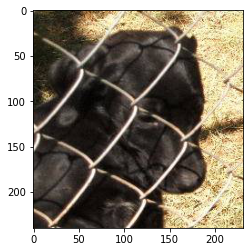

In [61]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4013.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4013.jpg')
imgplot = plt.imshow(img)
plt.show()


####<b> Predict the image


[[3.83575e-36]]
Prediction:  Cat


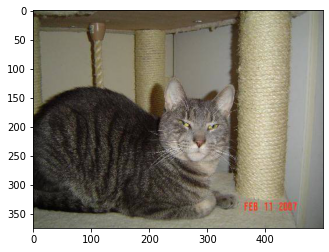

In [62]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4013.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4013.jpg')
imgplot = plt.imshow(img)
plt.show()


### <b> Build the basic CNN model 1

####<b> Let's add add some layers to prevent ovetfitting


**Dropout:** used to deactive some neurons randomly to prevent overfitting
<br>
**Early Stop:**
To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased
<br>
**Learning Rate Reduction:**
We will reduce the learning rate when then accuracy not increase for 2 steps
- monitor: quantity to be monitored.
- factor: factor by which the learning rate will be reduced. new_lr = lr * factor
- patience: number of epochs with no improvement after which learning rate will be reduced.
- verbose: int. 0: quiet, 1: update messages.
- mode: one of {auto, min, max}. In min mode, lr will be reduced when the quantity monitored has stopped decreasing; in max mode it will be reduced when the quantity monitored has stopped increasing; in auto mode, the direction is automatically inferred from the name of the monitored quantity.
- min_delta: threshold for measuring the new optimum, to only focus on significant changes.
- cooldown: number of epochs to wait before resuming normal operation after lr has been reduced.
- min_lr: lower bound on the learning rate.



In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
# ReduceLROnPlateau: Reduce learning rate when a metric has stopped improving
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)


callbacks = [earlystop, learning_rate_reduction]

In [ ]:
'''
model = Sequential()

model.add(Conv2D(filters=64,kernel_size=(3,3), activation='relu',input_shape=input_shape)) 
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=64,kernel_size=(3,3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(128, activation = 'relu')) 
model.add(Dense(1, activation = 'sigmoid')) #output layer
model.summary()



'''



In [63]:


'''
model1.add(Conv2D(64,(3,3),input_shape=input_shape)) 
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
'''

model1 = Sequential()

model1.add(Conv2D(filters=64,kernel_size=(3,3), activation='relu',input_shape=input_shape)) 
model1.add(MaxPooling2D(pool_size=(2,2)))


model1.add(Conv2D(filters=64,kernel_size=(3,3), activation='relu')) 
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(filters=64,kernel_size=(3,3), activation='relu')) 
model1.add(MaxPooling2D(pool_size=(2,2)))


model1.add(Flatten())

model1.add(Dense(64, activation = 'relu')) 
# model1.add(Dropout(0.5)) 

model1.add(Dense(1, activation = 'sigmoid')) #output layer
model1.summary()


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 18496)           

#### <b> Compile the basic CNN model1 

In [64]:
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model1.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 18496)           

#### <b> Fit the basic CNN model1 

In [65]:
training = model1.fit_generator(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples,callbacks=callbacks)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
100/100 [==============================] - 20s 194ms/step - loss: 0.7203 - accuracy: 0.5007 - val_loss: 0.6878 - val_accuracy: 0.5905
Epoch 2/20
100/100 [==============================] - 19s 189ms/step - loss: 0.6918 - accuracy: 0.5426 - val_loss: 0.6896 - val_accuracy: 0.5810
Epoch 3/20
100/100 [==============================] - 19s 191ms/step - loss: 0.6862 - accuracy: 0.5662 - val_loss: 0.6894 - val_accuracy: 0.5835
Epoch 4/20
100/100 [==============================] - 19s 192ms/step - loss: 0.6902 - accuracy: 0.5720 - val_loss: 0.6535 - val_accuracy: 0.6195
Epoch 5/20
100/100 [==============================] - 19s 193ms/step - loss: 0.6588 - accuracy: 0.6018 - val_loss: 0.6421 - val_accuracy: 0.6510
Epoch 6/20
100/100 [==============================] - 19s 190ms/step - loss: 0.6400 - accuracy: 0.6439 - val_loss: 0.6210 - val_accuracy: 0.6770
Epoch 7/20
100/100 [==============================] - 19s 189ms/step - loss: 0.6274 - accuracy: 0.6648 - val_loss: 0.6136 - val_ac

#### <b> Find the accuracy score


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


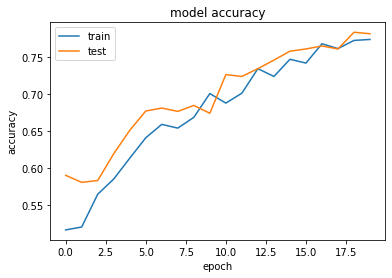

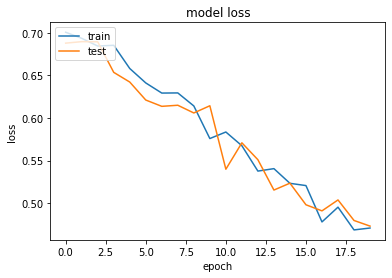

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### <b> Predict the image


[[1.]]
Prediction:  Dog


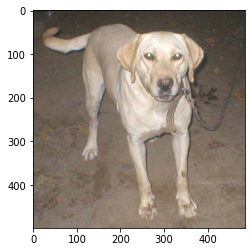

In [67]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4514.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result = model1.predict(img_pred)
print(result)
if result[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4514.jpg')
imgplot = plt.imshow(img)
plt.show()


[[1.]]
Prediction:  Dog


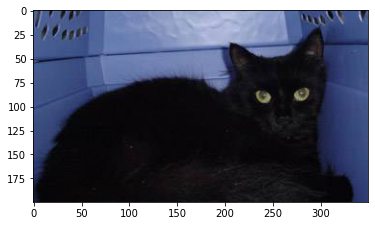

In [68]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4514.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model1.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat" #int('Prediction: ',prediction)
print('Prediction: ',prediction)    

img=mpimg.imread('/content/test_set/test_set/cats/cat.4514.jpg')
imgplot = plt.imshow(img)
plt.show()


### <b> Build the basic CNN model 2

![alt text](https://i.imgur.com/wpLHgqN.jpg)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)


callbacks = [earlystop, learning_rate_reduction]

###########################################################

model2 = Sequential()
model2.add(Conv2D(32,(3,3),input_shape=input_shape)) 
#model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model2.add(BatchNormalization())

model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='softmax')) # 2 because we have cat and dog classes




#### <b> Compile the basic CNN model2

In [ ]:
#model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)       

#### <b> Fit the basic CNN model2 

In [ ]:
training = model2.fit_generator(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples,callbacks=callbacks)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
100/100 [==============================] - 166s 2s/step - loss: 1.2953 - accuracy: 0.4849 - val_loss: 1.3025 - val_accuracy: 0.5015
Epoch 2/20
100/100 [==============================] - 164s 2s/step - loss: 0.8974 - accuracy: 0.5043 - val_loss: 0.7132 - val_accuracy: 0.5020
Epoch 3/20
100/100 [==============================] - 163s 2s/step - loss: 0.7400 - accuracy: 0.4908 - val_loss: 0.7398 - val_accuracy: 0.4995
Epoch 4/20
100/100 [==============================] - 164s 2s/step - loss: 0.7470 - accuracy: 0.4913 - val_loss: 0.7756 - val_accuracy: 0.4990
Epoch 5/20
100/100 [==============================] - 165s 2s/step - loss: 0.6370 - accuracy: 0.5265 - val_loss: 0.7285 - val_accuracy: 0.5010
Epoch 6/20
100/100 [==============================] - 170s 2s/step - loss: 0.6268 - accuracy: 0.4748 - val_loss: 0.5571 - val_accuracy: 0.4995
Epoch 7/20
100/100 [==============================] - 165s 2s/step - loss: 0.5875 - accuracy: 0.5081 - val_loss: 0.6309 - val_accuracy: 0.4990

#### <b> Find the accuracy score


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


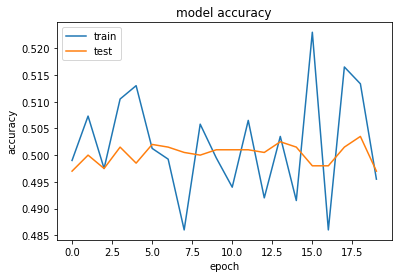

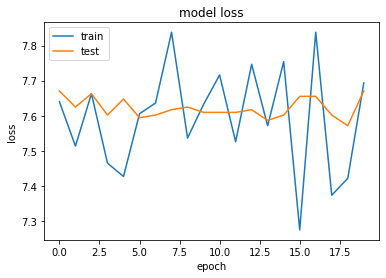

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### <b> Predict the image


[[1.]]
Prediction:  Dog


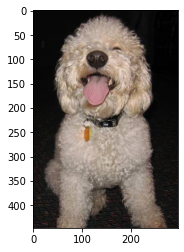

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result = model2.predict(img_pred)
print(result)
if result[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()


[[1.]]
Prediction:  Dog


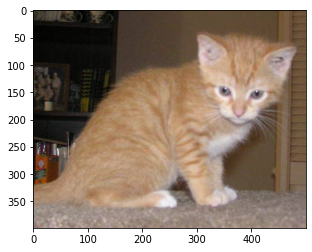

In [ ]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model2.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()


####Freeze the model

In [ ]:

import json
from keras.models import model_from_json
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# serialize model to JSON
#model_json = model.to_json()
#model2 = Sequential()

model_json = model2.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model_json)



model.save_weights('first_try.h5')
print("[INFO] Saved model to disk")


[INFO] Saved model to disk


#### Load the model

In [ ]:
# load json and create model
json_file = open('model2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("first_try.h5")
print("Loaded model from disk")
# load the model we saved
#model=load_model("kwhFinal.h5")

# predicting images
img = image.load_img(r"/content/training_set/training_set/cats/cat.1.jpg", target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

clas = loaded_model.predict_classes(x)
print(clas)
clas = model2.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

ValueError: ignored

### <b> Build CNN model 3 using VGG16 pretrained model

![alt text](https://i.imgur.com/EyeXqiB.png)

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications import VGG16
from keras.models import Model

image_size = 150
input_shape = (image_size, image_size, 3)

epochs = 20
batch_size = 16

pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
    
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model3 = Model(pre_trained_model.input, x)



58892288/58889256 [==============================] - 0s 0us/step


#### <b> Compile the basic CNN model3

In [ ]:
model3.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

model3.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)      

#### <b> Fit the basic CNN model3 

In [ ]:
training = model3.fit_generator(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples,callbacks=callbacks)

Epoch 1/20
100/100 [==============================] - 24s 241ms/step - loss: 0.7395 - accuracy: 0.5830 - val_loss: 0.5512 - val_accuracy: 0.7670
Epoch 2/20
100/100 [==============================] - 24s 241ms/step - loss: 0.5427 - accuracy: 0.7235 - val_loss: 0.4299 - val_accuracy: 0.8240
Epoch 3/20
100/100 [==============================] - 24s 244ms/step - loss: 0.4459 - accuracy: 0.7905 - val_loss: 0.3447 - val_accuracy: 0.8570
Epoch 4/20
100/100 [==============================] - 24s 243ms/step - loss: 0.3774 - accuracy: 0.8260 - val_loss: 0.2960 - val_accuracy: 0.8700
Epoch 5/20
100/100 [==============================] - 25s 250ms/step - loss: 0.3396 - accuracy: 0.8474 - val_loss: 0.2717 - val_accuracy: 0.8785
Epoch 6/20
100/100 [==============================] - 24s 244ms/step - loss: 0.3067 - accuracy: 0.8615 - val_loss: 0.2554 - val_accuracy: 0.8870
Epoch 7/20
100/100 [==============================] - 24s 242ms/step - loss: 0.2958 - accuracy: 0.8776 - val_loss: 0.2380 - val_ac

#### <b> Find the accuracy score


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


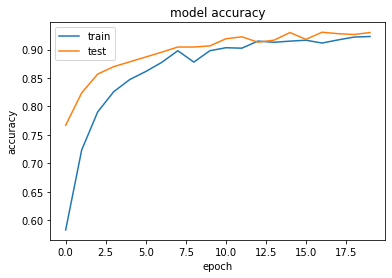

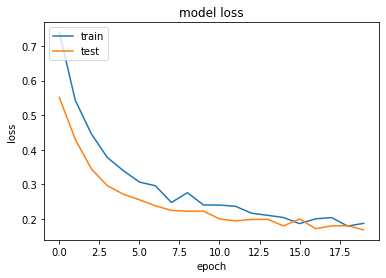

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### <b> Predict the image


[[1.]]
Prediction:  Dog


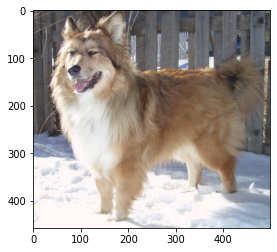

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result = model3.predict(img_pred)
print(result)
if result[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4006.jpg')
imgplot = plt.imshow(img)
plt.show()


[[0.]]
Prediction:  Cat


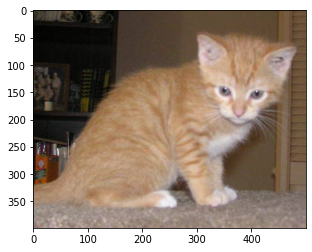

In [ ]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model3.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()


**After using the pre-trained model our model is successfully identified all the images with high accuracy**

# DIY: Assignment

####**Total Marks: 50**
**Duration: 6 days**

As a part of this assignment following are the list of task that may help  improve your skills with CNN and TensorFlow. It is important to get hands-on experience with CNN in order to learn how to use it properly.

You may want to backup this Notebook before making any changes.


###**`.ipynb file 1`** 


**Marks: 10**
> - Do you get the exact same results if you run the Notebook multiple times without changing any parameters?
- What is the effect of adding more neurons to each Conv2D layer?
- What happens if we manipulate the value of dropout?
- What is the effect of adding more activation layers to the network?
- What is the accuracy score if we use more dense layers in the model?
- Does manipulating the learning rate affect the model? Justify your answer.


###**`.ipynb file 2`** 


**Marks: 15**
>- Try improving the model and re-code the program from scratch without looking too much at this source-code.
>- Add more Dense and Conv2D layers in the network
>- Try to use Different activation function
>- Increase the number of epochs to achieve high accuracy
>- Try to play with learning rate to understand the concept
- Write up a summary explaining how your program works.


###**`.ipynb file 3`**



**Marks: 25**
>**Problem Statement**<br>
The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image. The task is to categorize each face based on the emotion shown in the facial expression into one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).<br>
<br>
**Dataset Description**
- **Total Images**: The dataset consists of 28,709 examples 
<br>
- Fer2013.csv  contains two columns, "emotion" and "pixels". The "emotion" column contains a numeric code ranging from 0 to 6, inclusive, for the emotion that is present in the image. The "pixels" column contains a string surrounded in quotes for each image. 
- Classes: 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral 

![alt text](https://i.imgur.com/lGvw0Bq.png)
 


>**Tasks to be Performed:**
As a part of this assignment you will be performing the following tasks:
- Prepare a detailed python notebook(similar to this one) using convolutional neural network for classifing the images from [Fer.csv](https://www.kaggle.com/deadskull7/fer2013) with best accuracy
- Prepare the dataset for the model
- Reshape and Normalize the data:
<br>
<b>Hint:</b><br>
•	Split pixels by space to get columns 
•	reshape the input image (48,  48 ,1)<br>
•	change the type of data to float32

- Normalize & Train_Test Split 
<br>
<b>Hint:</b><br>
•	Normalize the data by dividing with 255<br>
•	Split data into train and test (90,10)

<b> Define CNN Model: </b>
- •	Layer 1<br>
•	2 Conv2d with 64 filters of 5,5 filter <br>
•	BatchNormalization layer<br>
•	Max Pooling layer with 2,2 <br>
•	Activation relu <br>
- •	Layer 2<br>
•	2 Conv2d with 128 filters of 5,5 filter <br>
•	BatchNormalization layer<br>
•	Max Pooling layer with 2,2 <br>
•	Activation relu<br>
- •	Layer 3<br>
•	2 Conv2d with 256 filters of 3,3 filter<br> 
•	BatchNormalization layer<br>
•	Max Pooling layer with 2,2 <br>
•	Activation relu<br>
- •	Layer 4<br>
•	Flatten layer <br>
•	Dense Layer with 128 Neuron <br>
•	BatchNormalization<br> 
•	Activation Relu <br>
•	Dropout 0.25 <br>
•	Dense 7 neurons with Softmax <br>
•	Loss: Categorical cross-entropy <br>
•	Optimizer: Adam <br>


**Answer:** What parameters should be choosen to get best accuracy on classifying the images into various categories?